In [1]:
pip install ucimlrepo pandas numpy matplotlib seaborn scikit-learn

  Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.59.0-cp313-cp313-win_amd64.whl.metadata (110 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.3.0-cp313-cp313-win_amd64.whl.metadata (9.2 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached pandas-2.3.1-cp313-cp313-win_amd64.whl (11.0 MB)
Using cached numpy-2.3.2-cp313-cp313-win_amd64.whl (12.8 MB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------------------------------------

In [ ]:
# ========================================================================
# CELL 1: PROJECT SETUP AND IMPORTS
# ========================================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from ucimlrepo import fetch_ucirepo
import warnings
warnings.filterwarnings('ignore')

# Set plotting style for better visualizations
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)



🏠 REAL ESTATE VALUATION ANALYTICS - CAPSTONE PROJECT
📚 Course: INSY 8413 | Introduction to Big Data Analytics
🎯 Problem: Predicting Real Estate Prices using Big Data Analytics


🏠 REAL ESTATE VALUATION ANALYTICS - CAPSTONE PROJECT
============================================================
Author: Iteka Laure 22718
📚 Course: INSY 8413 | Introduction to Big Data Analytics
🎯 Problem: Predicting Real Estate Prices using Big Data Analytics
============================================================

📋 PART 1: PROBLEM DEFINITION & PLANNING
--------------------------------------------------
• Sector: ☑️ Finance (Real Estate)
• Problem Statement: Can we predict real estate property values based on location factors, 
    accessibility to public transportation, and neighborhood amenities to help investors 
    and buyers make informed decisions?
• Dataset: Real Estate Valuation Data Set from UCI ML Repository
• Dataset URL: https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set
• Business Impact: 
    • Help real estate investors identify undervalued properties
    • Assist home buyers understand fair market pricing  
    • Support urban planners assess infrastructure impact on property values
    • Improve financial institutions' property appraisal accuracy
    
• Expected Rows: 414 properties
• Expected Columns: 8 features
• Data Structure: ☑️ Structured (CSV format)
• Data Status: ☑️ Clean (minimal preprocessing needed)

In [7]:
print("\n📊 PART 2: DATA LOADING AND EXPLORATION")
print("-" * 50)
print("🔄 Fetching dataset from UCI ML Repository...")

# Fetch dataset from UCI
real_estate_valuation = fetch_ucirepo(id=477)

# Get features and target
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

# Combine features and target into one dataframe
df_raw = pd.concat([X, y], axis=1)

# Print metadata
print("\n📋 Dataset Metadata:")
print(real_estate_valuation.metadata)

print("\n📊 Variable Information:")
print(real_estate_valuation.variables)

print(f"\n✅ Dataset loaded successfully!")
print(f"📏 Dataset shape: {df_raw.shape}")
print(f"🏠 Total properties: {len(df_raw)}")



📊 PART 2: DATA LOADING AND EXPLORATION
--------------------------------------------------
🔄 Fetching dataset from UCI ML Repository...

📋 Dataset Metadata:
{'uci_id': 477, 'name': 'Real Estate Valuation', 'repository_url': 'https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set', 'data_url': 'https://archive.ics.uci.edu/static/public/477/data.csv', 'abstract': 'The real estate valuation is a regression problem. The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. ', 'area': 'Business', 'tasks': ['Regression'], 'characteristics': ['Multivariate'], 'num_instances': 414, 'num_features': 6, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y house price of unit area'], 'index_col': ['No'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2018, 'last_updated': 'Mon Feb 26 2024', 'dataset_doi': '10.24432/C5J30W', 'creators': ['I-Cheng Yeh'], 'intro_pape

In [8]:
print("\n🔍 INITIAL DATA EXPLORATION")
print("-" * 30)

# Basic information
print("📊 Dataset Info:")
print(df_raw.info())

print("\n📈 Descriptive Statistics:")
print(df_raw.describe())

print("\n🔍 Missing Values Check:")
missing_values = df_raw.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("✅ No missing values found!")

print("\n📋 First 10 Rows:")
print(df_raw.head(10))

print("\n📋 Last 5 Rows:")
print(df_raw.tail())

print("\n🏷️ Column Names:")
for i, col in enumerate(df_raw.columns):
    print(f"{i+1}. {col}")



🔍 INITIAL DATA EXPLORATION
------------------------------
📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
 6   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(1)
memory usage: 22.8 KB
None

📈 Descriptive Statistics:
       X1 transaction date  X2 house age  \
count           414.000000    414.000000   
mean           2013.148971   

In [9]:
print("\n🧹 PART 3: DATA PREPROCESSING & FEATURE ENGINEERING")
print("-" * 50)

# Create a copy to avoid modifying original data
df_processed = df_raw.copy()

# Rename columns for better readability
column_mapping = {
    'X1 transaction date': 'transaction_date',
    'X2 house age': 'house_age',
    'X3 distance to the nearest MRT station': 'distance_to_MRT',
    'X4 number of convenience stores': 'convenience_stores',
    'X5 latitude': 'latitude',
    'X6 longitude': 'longitude',
    'Y house price of unit area': 'price_per_unit_area'
}

df_processed = df_processed.rename(columns=column_mapping)
print("✅ Column names standardized")

# Feature Engineering
print("\n🔧 Feature Engineering:")

# 1. Extract year and month from transaction date
df_processed['transaction_year'] = df_processed['transaction_date'].astype(int)
df_processed['transaction_month'] = ((df_processed['transaction_date'] - 
                                    df_processed['transaction_year']) * 12).round().astype(int)
print("• Extracted year and month from transaction date")

# 2. Create age categories
df_processed['age_category'] = pd.cut(df_processed['house_age'], 
                                    bins=[-1, 5, 15, 30, float('inf')], 
                                    labels=['New', 'Modern', 'Mature', 'Old'])
print("• Created house age categories")

# 3. Create distance categories
df_processed['distance_category'] = pd.cut(df_processed['distance_to_MRT'], 
                                         bins=[0, 300, 800, 1500, float('inf')], 
                                         labels=['Very_Close', 'Close', 'Moderate', 'Far'])
print("• Created distance to MRT categories")

# 4. Create convenience store categories
df_processed['store_category'] = pd.cut(df_processed['convenience_stores'], 
                                      bins=[-1, 2, 5, 8, float('inf')], 
                                      labels=['Few', 'Some', 'Many', 'Abundant'])
print("• Created convenience store categories")

# 5. Create composite accessibility score
df_processed['accessibility_score'] = (
    (df_processed['convenience_stores'] / df_processed['convenience_stores'].max()) * 0.4 +
    (1 - df_processed['distance_to_MRT'] / df_processed['distance_to_MRT'].max()) * 0.6
)
print("• Created accessibility score")

# 6. Create price categories for analysis
df_processed['price_category'] = pd.cut(df_processed['price_per_unit_area'], 
                                      bins=3, 
                                      labels=['Low', 'Medium', 'High'])
print("• Created price categories")

# 7. Create location clusters based on lat/lng
location_kmeans = KMeans(n_clusters=5, random_state=42)
df_processed['location_cluster'] = location_kmeans.fit_predict(
    df_processed[['latitude', 'longitude']]
)
print("• Created location clusters")

print(f"\n✅ Preprocessing completed!")
print(f"📏 Final dataset shape: {df_processed.shape}")
print(f"🆕 New features created: {df_processed.shape[1] - df_raw.shape[1]}")

# Display the processed dataset
print("\n📋 Processed Dataset Sample:")
print(df_processed[['transaction_date', 'house_age', 'distance_to_MRT', 'convenience_stores', 
                   'price_per_unit_area', 'accessibility_score', 'age_category', 'distance_category']].head())



🧹 PART 3: DATA PREPROCESSING & FEATURE ENGINEERING
--------------------------------------------------
✅ Column names standardized

🔧 Feature Engineering:
• Extracted year and month from transaction date
• Created house age categories
• Created distance to MRT categories
• Created convenience store categories
• Created accessibility score
• Created price categories
• Created location clusters

✅ Preprocessing completed!
📏 Final dataset shape: (414, 15)
🆕 New features created: 8

📋 Processed Dataset Sample:
   transaction_date  house_age  distance_to_MRT  convenience_stores  \
0          2012.917       32.0         84.87882                  10   
1          2012.917       19.5        306.59470                   9   
2          2013.583       13.3        561.98450                   5   
3          2013.500       13.3        561.98450                   5   
4          2012.833        5.0        390.56840                   5   

   price_per_unit_area  accessibility_score age_category dist


🔍 PART 4A: EXPLORATORY DATA ANALYSIS - DISTRIBUTIONS
-------------------------------------------------------


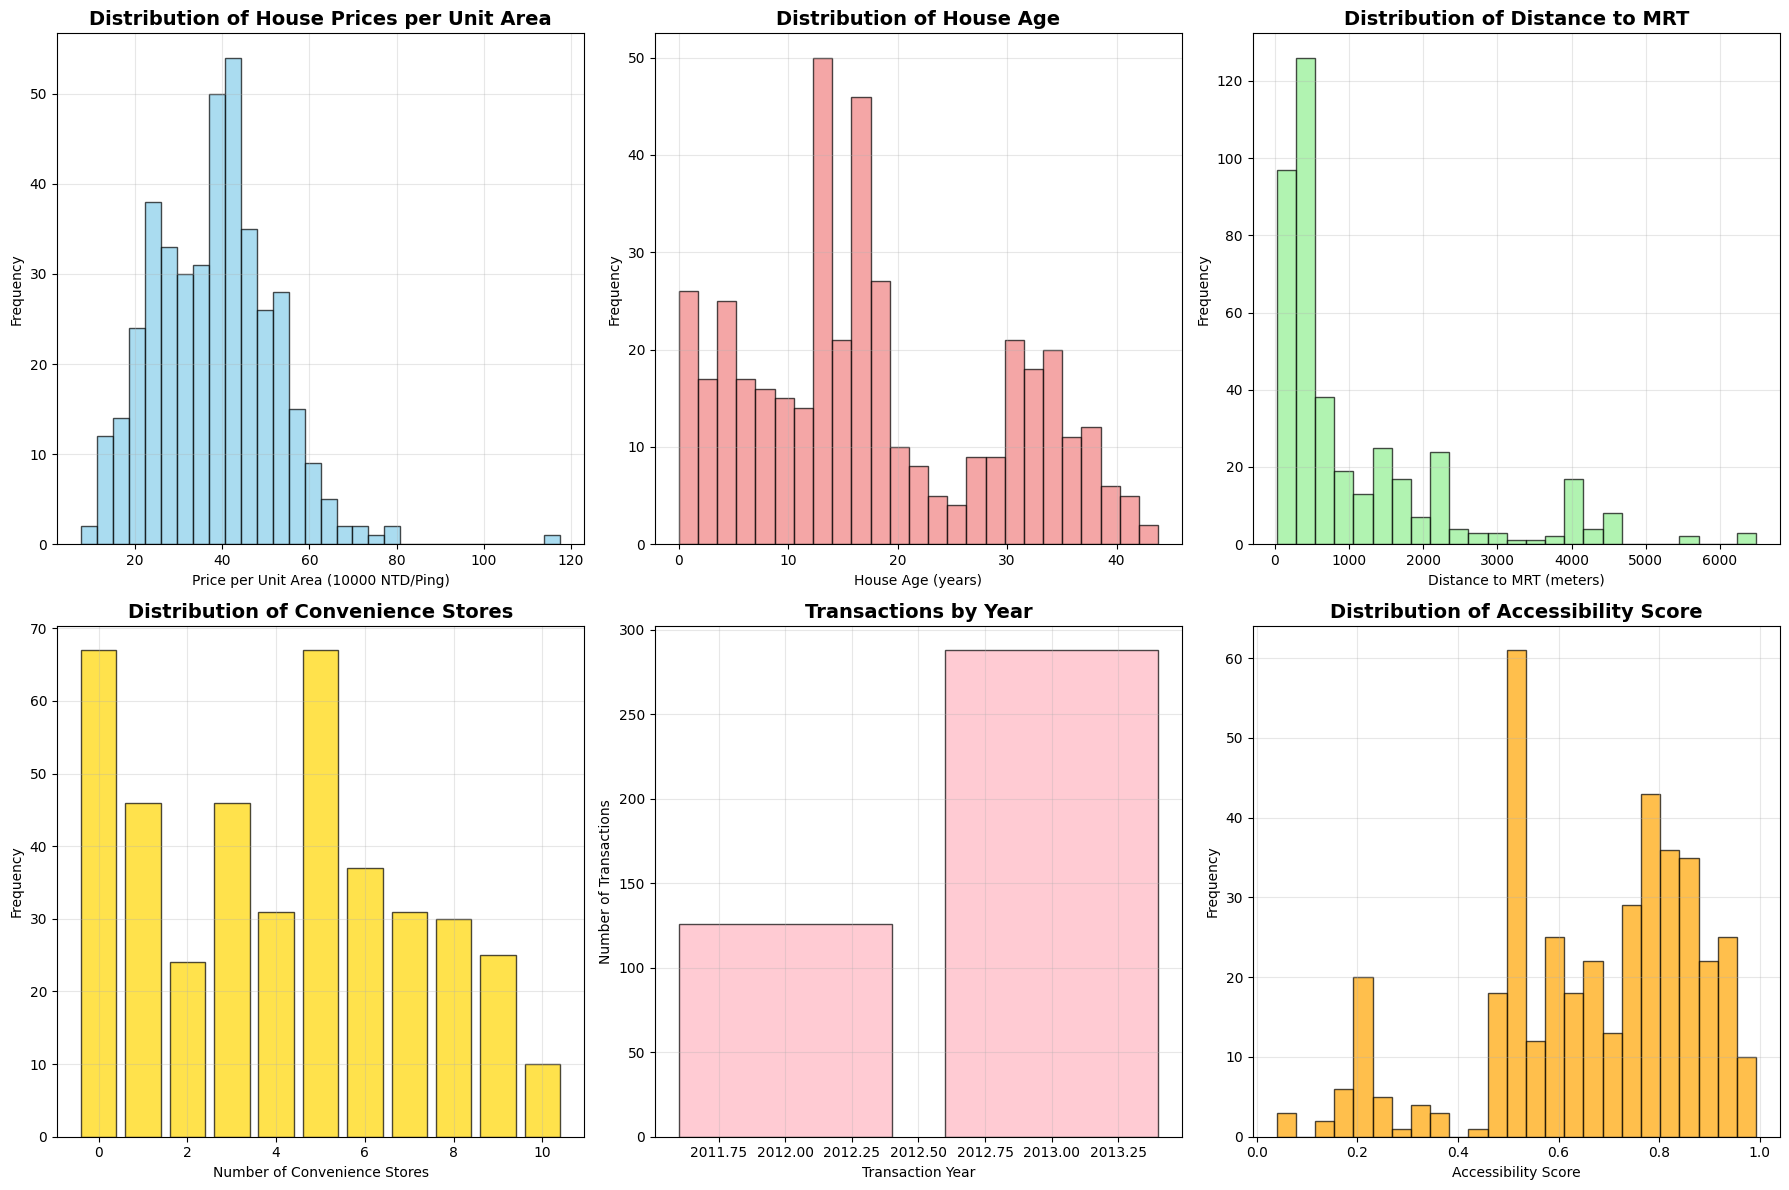


📈 KEY DISTRIBUTION INSIGHTS:
• Average house price: 37.98 (10000 NTD/Ping)
• Price standard deviation: 13.61
• Price range: 7.60 - 117.50
• Average house age: 17.7 years
• Average distance to MRT: 1084 meters
• Average convenience stores: 4.1


In [10]:
print("\n🔍 PART 4A: EXPLORATORY DATA ANALYSIS - DISTRIBUTIONS")
print("-" * 55)

# Set up the plotting area for distributions
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. Price distribution
axes[0,0].hist(df_processed['price_per_unit_area'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].set_title('Distribution of House Prices per Unit Area', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('Price per Unit Area (10000 NTD/Ping)')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. House age distribution
axes[0,1].hist(df_processed['house_age'], bins=25, alpha=0.7, color='lightcoral', edgecolor='black')
axes[0,1].set_title('Distribution of House Age', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('House Age (years)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# 3. Distance to MRT distribution
axes[0,2].hist(df_processed['distance_to_MRT'], bins=25, alpha=0.7, color='lightgreen', edgecolor='black')
axes[0,2].set_title('Distribution of Distance to MRT', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Distance to MRT (meters)')
axes[0,2].set_ylabel('Frequency')
axes[0,2].grid(True, alpha=0.3)

# 4. Convenience stores distribution
store_counts = df_processed['convenience_stores'].value_counts().sort_index()
axes[1,0].bar(store_counts.index, store_counts.values, alpha=0.7, color='gold', edgecolor='black')
axes[1,0].set_title('Distribution of Convenience Stores', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Number of Convenience Stores')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# 5. Transaction year distribution
year_counts = df_processed['transaction_year'].value_counts().sort_index()
axes[1,1].bar(year_counts.index, year_counts.values, alpha=0.7, color='lightpink', edgecolor='black')
axes[1,1].set_title('Transactions by Year', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Transaction Year')
axes[1,1].set_ylabel('Number of Transactions')
axes[1,1].grid(True, alpha=0.3)

# 6. Accessibility score distribution
axes[1,2].hist(df_processed['accessibility_score'], bins=25, alpha=0.7, color='orange', edgecolor='black')
axes[1,2].set_title('Distribution of Accessibility Score', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Accessibility Score')
axes[1,2].set_ylabel('Frequency')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print key statistics
print("\n📈 KEY DISTRIBUTION INSIGHTS:")
print(f"• Average house price: {df_processed['price_per_unit_area'].mean():.2f} (10000 NTD/Ping)")
print(f"• Price standard deviation: {df_processed['price_per_unit_area'].std():.2f}")
print(f"• Price range: {df_processed['price_per_unit_area'].min():.2f} - {df_processed['price_per_unit_area'].max():.2f}")
print(f"• Average house age: {df_processed['house_age'].mean():.1f} years")
print(f"• Average distance to MRT: {df_processed['distance_to_MRT'].mean():.0f} meters")
print(f"• Average convenience stores: {df_processed['convenience_stores'].mean():.1f}")



🔍 PART 4B: EXPLORATORY DATA ANALYSIS - RELATIONSHIPS
-------------------------------------------------------


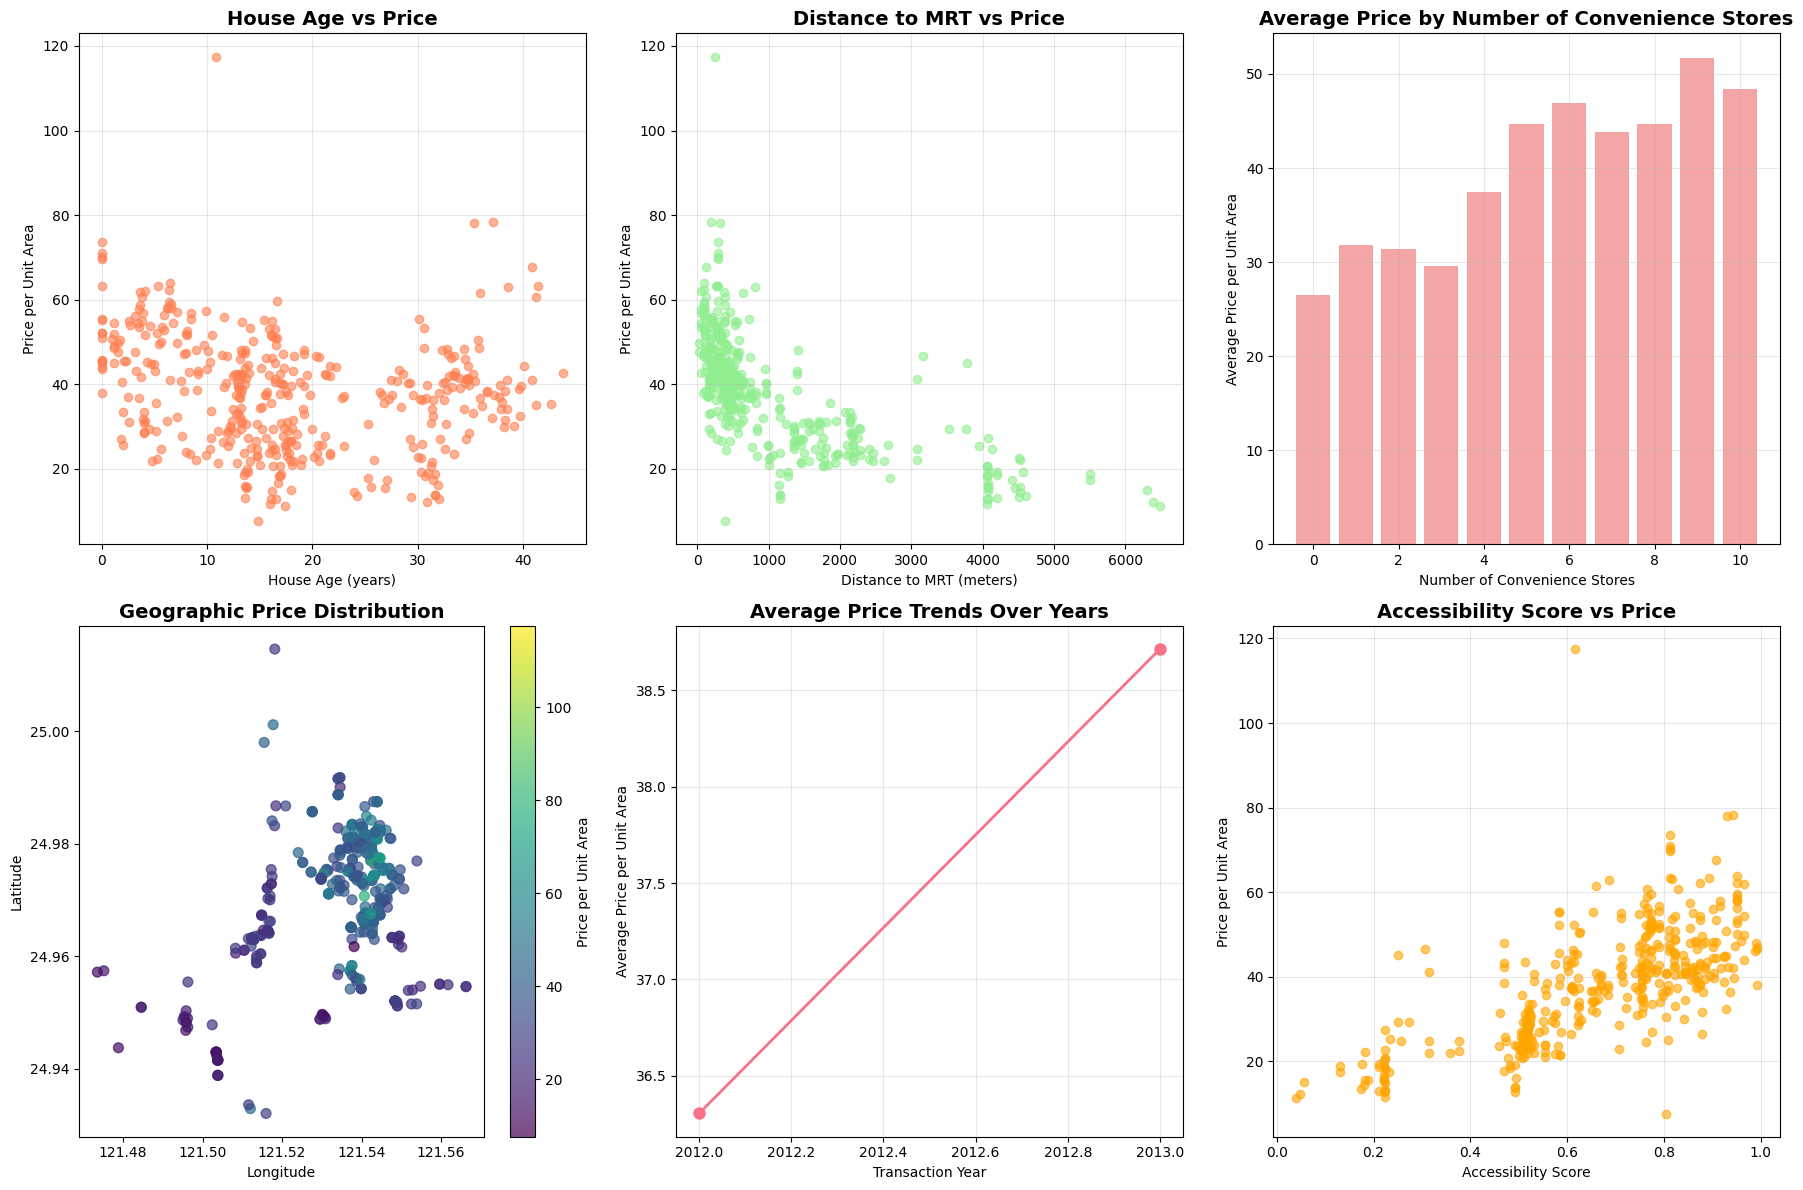

In [11]:

print("\n🔍 PART 4B: EXPLORATORY DATA ANALYSIS - RELATIONSHIPS")
print("-" * 55)

# Set up the plotting area for relationships
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# 1. House age vs Price
axes[0,0].scatter(df_processed['house_age'], df_processed['price_per_unit_area'], alpha=0.6, color='coral')
axes[0,0].set_title('House Age vs Price', fontsize=14, fontweight='bold')
axes[0,0].set_xlabel('House Age (years)')
axes[0,0].set_ylabel('Price per Unit Area')
axes[0,0].grid(True, alpha=0.3)

# 2. Distance to MRT vs Price
axes[0,1].scatter(df_processed['distance_to_MRT'], df_processed['price_per_unit_area'], alpha=0.6, color='lightgreen')
axes[0,1].set_title('Distance to MRT vs Price', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Distance to MRT (meters)')
axes[0,1].set_ylabel('Price per Unit Area')
axes[0,1].grid(True, alpha=0.3)

# 3. Convenience stores impact
store_price = df_processed.groupby('convenience_stores')['price_per_unit_area'].mean().reset_index()
axes[0,2].bar(store_price['convenience_stores'], store_price['price_per_unit_area'], 
            color='lightcoral', alpha=0.7)
axes[0,2].set_title('Average Price by Number of Convenience Stores', fontsize=14, fontweight='bold')
axes[0,2].set_xlabel('Number of Convenience Stores')
axes[0,2].set_ylabel('Average Price per Unit Area')
axes[0,2].grid(True, alpha=0.3)

# 4. Geographic distribution with price
scatter = axes[1,0].scatter(df_processed['longitude'], df_processed['latitude'], 
                     c=df_processed['price_per_unit_area'], cmap='viridis', 
                     alpha=0.7, s=50)
plt.colorbar(scatter, ax=axes[1,0], label='Price per Unit Area')
axes[1,0].set_title('Geographic Price Distribution', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Longitude')
axes[1,0].set_ylabel('Latitude')

# 5. Price trends over time
time_price = df_processed.groupby('transaction_year')['price_per_unit_area'].mean()
axes[1,1].plot(time_price.index, time_price.values, marker='o', linewidth=2, markersize=8)
axes[1,1].set_title('Average Price Trends Over Years', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Transaction Year')
axes[1,1].set_ylabel('Average Price per Unit Area')
axes[1,1].grid(True, alpha=0.3)

# 6. Accessibility score vs Price
axes[1,2].scatter(df_processed['accessibility_score'], df_processed['price_per_unit_area'], alpha=0.6, color='orange')
axes[1,2].set_title('Accessibility Score vs Price', fontsize=14, fontweight='bold')
axes[1,2].set_xlabel('Accessibility Score')
axes[1,2].set_ylabel('Price per Unit Area')
axes[1,2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



🔗 PART 4C: CORRELATION AND CATEGORICAL ANALYSIS
--------------------------------------------------


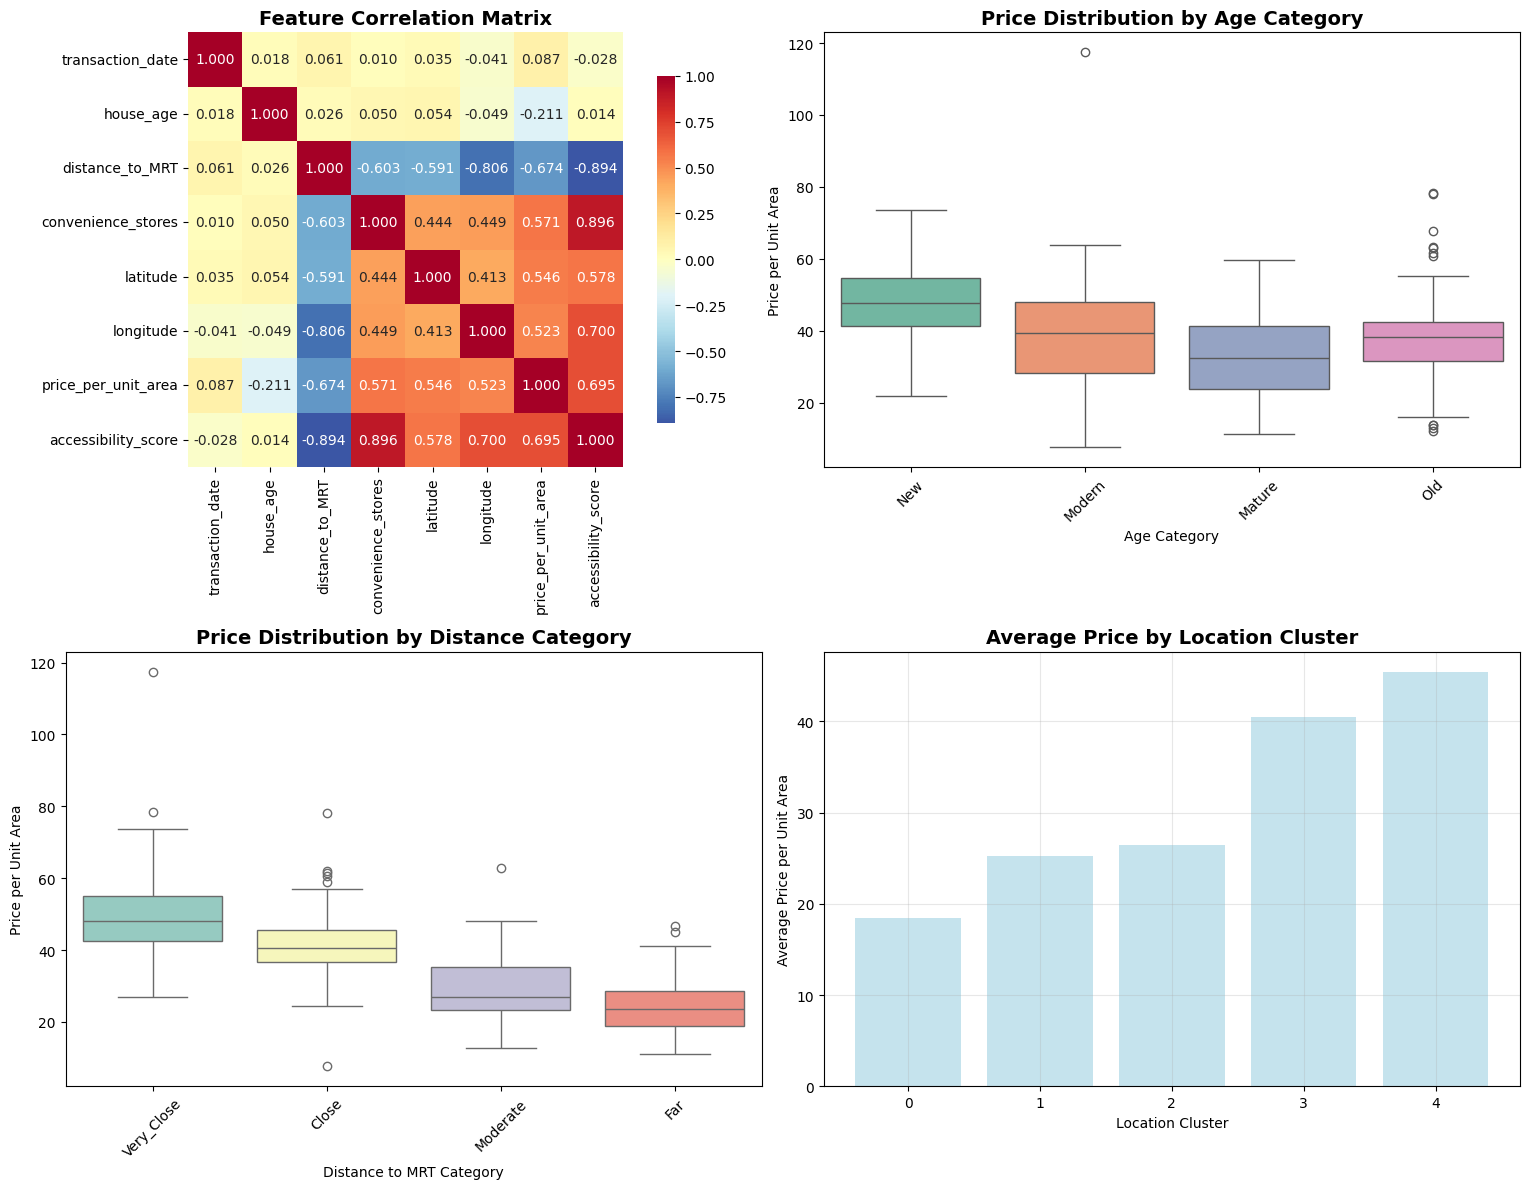


🔗 STRONGEST CORRELATIONS WITH PRICE:
• accessibility_score: 0.695
• distance_to_MRT: 0.674
• convenience_stores: 0.571
• latitude: 0.546
• longitude: 0.523
• house_age: 0.211
• transaction_date: 0.087


In [12]:

print("\n🔗 PART 4C: CORRELATION AND CATEGORICAL ANALYSIS")
print("-" * 50)

# Correlation analysis
correlation_cols = ['transaction_date', 'house_age', 'distance_to_MRT', 
                   'convenience_stores', 'latitude', 'longitude', 'price_per_unit_area', 'accessibility_score']
corr_matrix = df_processed[correlation_cols].corr()

# Set up the plotting area
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Correlation heatmap
sns.heatmap(corr_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, fmt='.3f', cbar_kws={'shrink': 0.8}, ax=axes[0,0])
axes[0,0].set_title('Feature Correlation Matrix', fontsize=14, fontweight='bold')

# 2. Age category analysis
sns.boxplot(data=df_processed, x='age_category', y='price_per_unit_area', palette='Set2', ax=axes[0,1])
axes[0,1].set_title('Price Distribution by Age Category', fontsize=14, fontweight='bold')
axes[0,1].set_xlabel('Age Category')
axes[0,1].set_ylabel('Price per Unit Area')
axes[0,1].tick_params(axis='x', rotation=45)

# 3. Distance category analysis
sns.boxplot(data=df_processed, x='distance_category', y='price_per_unit_area', palette='Set3', ax=axes[1,0])
axes[1,0].set_title('Price Distribution by Distance Category', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Distance to MRT Category')
axes[1,0].set_ylabel('Price per Unit Area')
axes[1,0].tick_params(axis='x', rotation=45)

# 4. Location cluster analysis
cluster_price = df_processed.groupby('location_cluster')['price_per_unit_area'].mean()
axes[1,1].bar(cluster_price.index, cluster_price.values, color='lightblue', alpha=0.7)
axes[1,1].set_title('Average Price by Location Cluster', fontsize=14, fontweight='bold')
axes[1,1].set_xlabel('Location Cluster')
axes[1,1].set_ylabel('Average Price per Unit Area')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print correlation insights
price_corr = corr_matrix['price_per_unit_area'].abs().sort_values(ascending=False)
print(f"\n🔗 STRONGEST CORRELATIONS WITH PRICE:")
for feature, corr in price_corr.items():
    if feature != 'price_per_unit_area':
        print(f"• {feature}: {corr:.3f}")


In [15]:

print("\n🤖 PART 5A: MACHINE LEARNING - MODEL PREPARATION")
print("-" * 50)

# Prepare features and target
feature_columns = ['transaction_date', 'house_age', 'distance_to_MRT', 
                  'convenience_stores', 'latitude', 'longitude', 
                  'accessibility_score', 'location_cluster']

X = df_processed[feature_columns]
y = df_processed['price_per_unit_area']

print(f"📊 Features used for modeling:")
for i, feature in enumerate(feature_columns, 1):
    print(f"  {i}. {feature}")

print(f"\n📏 Feature matrix shape: {X.shape}")
print(f"🎯 Target variable: price_per_unit_area")
print(f"📊 Target statistics:")
print(f"  • Mean: {y.mean():.2f}")
print(f"  • Std: {y.std():.2f}")
print(f"  • Min: {y.min():.2f}")
print(f"  • Max: {y.max():.2f}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state=42)

print(f"\n🔄 Data split completed:")
print(f"  • Training samples: {len(X_train)}")
print(f"  • Testing samples: {len(X_test)}")
print(f"  • Train/Test ratio: {len(X_train)/len(X_test):.1f}:1")

# Scale features for Linear Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\n⚖️ Feature scaling completed for Linear Regression")

# Display feature correlation in training data
print(f"\n📊 Training Data Feature Statistics:")
train_stats = X_train.describe()
print(train_stats)



🤖 PART 5A: MACHINE LEARNING - MODEL PREPARATION
--------------------------------------------------
📊 Features used for modeling:
  1. transaction_date
  2. house_age
  3. distance_to_MRT
  4. convenience_stores
  5. latitude
  6. longitude
  7. accessibility_score
  8. location_cluster

📏 Feature matrix shape: (414, 8)
🎯 Target variable: price_per_unit_area
📊 Target statistics:
  • Mean: 37.98
  • Std: 13.61
  • Min: 7.60
  • Max: 117.50

🔄 Data split completed:
  • Training samples: 331
  • Testing samples: 83
  • Train/Test ratio: 4.0:1

⚖️ Feature scaling completed for Linear Regression

📊 Training Data Feature Statistics:
       transaction_date   house_age  distance_to_MRT  convenience_stores  \
count        331.000000  331.000000       331.000000          331.000000   
mean        2013.166683   17.288822      1059.603962            4.145015   
std            0.281570   11.327281      1217.929569            2.953703   
min         2012.667000    0.000000        23.382840         

In [18]:
print("\n🤖 PART 5B: MACHINE LEARNING - MODEL TRAINING")
print("-" * 50)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

model_results = {}
trained_models = {}

print("🎯 Training and Evaluating Models:")

for name, model in models.items():
    print(f"\n📚 Training {name}...")
    
    # Use scaled data only for Linear Regression
    if name == 'Linear Regression':
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        X_train_model = X_train_scaled
        X_test_model = X_test_scaled
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        X_train_model = X_train
        X_test_model = X_test
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_model, y_train, cv=5, scoring='r2')
    
    model_results[name] = {
        'R²': r2,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'CV Mean R²': cv_scores.mean(),
        'CV Std R²': cv_scores.std(),
        'Predictions': y_pred
    }
    
    trained_models[name] = model

    print(f"✅ {name} trained successfully!")
    print(f"  • R²: {r2:.4f}") 



🤖 PART 5B: MACHINE LEARNING - MODEL TRAINING
--------------------------------------------------
🎯 Training and Evaluating Models:

📚 Training Linear Regression...
✅ Linear Regression trained successfully!
  • R²: 0.7070

📚 Training Random Forest...
✅ Random Forest trained successfully!
  • R²: 0.8109

📚 Training Gradient Boosting...
✅ Gradient Boosting trained successfully!
  • R²: 0.8183


In [19]:
# Export the processed dataframe for Power BI
df_processed.to_csv('real_estate_valuation_powerbi.csv', index=False)
print("✅ Data exported to 'real_estate_valuation_powerbi.csv' for Power BI.")

✅ Data exported to 'real_estate_valuation_powerbi.csv' for Power BI.
